Problem Statement - A Big Walmart store at any point in time requires a number of Employees to be present for at most 15 minutes for smooth exit for customers on daily basis. But calling an employee for just 15 minutes is not feasible. Hence, An employee has an shift of 2 hrs. once he is called for the day. Shifts can be considered no cyclic that is starts at 12:00 am and ends at 11:59 pm.

In [60]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
scheduled_slots = list(range(1,(24*4)+1))

In [62]:
actual_requirements = []
for i in scheduled_slots:
    actual_requirements.append(random.randint(0,51))
actual_requirements

[33,
 13,
 49,
 10,
 28,
 27,
 25,
 44,
 14,
 29,
 0,
 50,
 15,
 46,
 23,
 0,
 51,
 28,
 31,
 47,
 42,
 7,
 0,
 8,
 35,
 48,
 34,
 30,
 9,
 20,
 42,
 18,
 19,
 40,
 28,
 27,
 13,
 5,
 32,
 42,
 19,
 38,
 1,
 1,
 20,
 19,
 49,
 48,
 15,
 42,
 21,
 32,
 31,
 15,
 1,
 1,
 23,
 28,
 32,
 35,
 8,
 28,
 17,
 25,
 7,
 46,
 43,
 37,
 48,
 1,
 44,
 27,
 19,
 46,
 42,
 8,
 4,
 11,
 49,
 48,
 12,
 20,
 35,
 18,
 19,
 10,
 35,
 34,
 42,
 46,
 18,
 25,
 6,
 29,
 31,
 34]

In [63]:
import pulp
# from pulp import *
from pulp import LpMaximize,LpProblem,LpStatus, lpSum, LpVariable, LpMinimize

AT any point of time t
meeting_positions should be equal to sum previous 16 filled poistions (including current position) <br>

Define our problem or Objective function here that is we want global minimum for our problem

In [64]:
prob = LpProblem('MinumumEmployeesAssignment',LpMinimize)

In [65]:
filled_positions = []

Defining Decision variables for our Problem with lowBound being 0, Category being integer and not defining upBound as of now

In [66]:
for i,position in enumerate(actual_requirements):
    variable = str('X'+str(i))
    variable = LpVariable(str(variable),lowBound=0,cat='Integer')
    filled_positions.append(variable)
    
print('Total number of Decision Variable ', len(filled_positions))
print('Array with Decision Variables ',str(filled_positions))

Total number of Decision Variable  96
Array with Decision Variables  [X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95]


In [67]:
total_cost = ''
for i in filled_positions:
    total_cost+=i
    
prob += total_cost
print('Optimisation function or Cost Function ',str(total_cost))

Optimisation function or Cost Function  X0 + X1 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X2 + X20 + X21 + X22 + X23 + X24 + X25 + X26 + X27 + X28 + X29 + X3 + X30 + X31 + X32 + X33 + X34 + X35 + X36 + X37 + X38 + X39 + X4 + X40 + X41 + X42 + X43 + X44 + X45 + X46 + X47 + X48 + X49 + X5 + X50 + X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58 + X59 + X6 + X60 + X61 + X62 + X63 + X64 + X65 + X66 + X67 + X68 + X69 + X7 + X70 + X71 + X72 + X73 + X74 + X75 + X76 + X77 + X78 + X79 + X8 + X80 + X81 + X82 + X83 + X84 + X85 + X86 + X87 + X88 + X89 + X9 + X90 + X91 + X92 + X93 + X94 + X95


In [68]:
for i,requirement in enumerate(actual_requirements):
    if i >= 7:
        prob += (filled_positions[i-7] + filled_positions[i-6] + filled_positions[i-5] + filled_positions[i-4] + 
                filled_positions[i-3] + filled_positions[i-2] + filled_positions[i-1] + filled_positions[i-0] >= requirement)

In [69]:
prob += (total_cost <= sum(actual_requirements))

In [70]:
print(prob)

MinumumEmployeesAssignment:
MINIMIZE
1*X0 + 1*X1 + 1*X10 + 1*X11 + 1*X12 + 1*X13 + 1*X14 + 1*X15 + 1*X16 + 1*X17 + 1*X18 + 1*X19 + 1*X2 + 1*X20 + 1*X21 + 1*X22 + 1*X23 + 1*X24 + 1*X25 + 1*X26 + 1*X27 + 1*X28 + 1*X29 + 1*X3 + 1*X30 + 1*X31 + 1*X32 + 1*X33 + 1*X34 + 1*X35 + 1*X36 + 1*X37 + 1*X38 + 1*X39 + 1*X4 + 1*X40 + 1*X41 + 1*X42 + 1*X43 + 1*X44 + 1*X45 + 1*X46 + 1*X47 + 1*X48 + 1*X49 + 1*X5 + 1*X50 + 1*X51 + 1*X52 + 1*X53 + 1*X54 + 1*X55 + 1*X56 + 1*X57 + 1*X58 + 1*X59 + 1*X6 + 1*X60 + 1*X61 + 1*X62 + 1*X63 + 1*X64 + 1*X65 + 1*X66 + 1*X67 + 1*X68 + 1*X69 + 1*X7 + 1*X70 + 1*X71 + 1*X72 + 1*X73 + 1*X74 + 1*X75 + 1*X76 + 1*X77 + 1*X78 + 1*X79 + 1*X8 + 1*X80 + 1*X81 + 1*X82 + 1*X83 + 1*X84 + 1*X85 + 1*X86 + 1*X87 + 1*X88 + 1*X89 + 1*X9 + 1*X90 + 1*X91 + 1*X92 + 1*X93 + 1*X94 + 1*X95 + 0
SUBJECT TO
_C1: X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 >= 44

_C2: X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 >= 14

_C3: X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 >= 29

_C4: X10 + X3 + X4 + X5 + X6 + X7 + X8 + X

In [71]:
prob.writeLP('MinimumEmployeesAssignment.lp')

[X0,
 X1,
 X10,
 X11,
 X12,
 X13,
 X14,
 X15,
 X16,
 X17,
 X18,
 X19,
 X2,
 X20,
 X21,
 X22,
 X23,
 X24,
 X25,
 X26,
 X27,
 X28,
 X29,
 X3,
 X30,
 X31,
 X32,
 X33,
 X34,
 X35,
 X36,
 X37,
 X38,
 X39,
 X4,
 X40,
 X41,
 X42,
 X43,
 X44,
 X45,
 X46,
 X47,
 X48,
 X49,
 X5,
 X50,
 X51,
 X52,
 X53,
 X54,
 X55,
 X56,
 X57,
 X58,
 X59,
 X6,
 X60,
 X61,
 X62,
 X63,
 X64,
 X65,
 X66,
 X67,
 X68,
 X69,
 X7,
 X70,
 X71,
 X72,
 X73,
 X74,
 X75,
 X76,
 X77,
 X78,
 X79,
 X8,
 X80,
 X81,
 X82,
 X83,
 X84,
 X85,
 X86,
 X87,
 X88,
 X89,
 X9,
 X90,
 X91,
 X92,
 X93,
 X94,
 X95]

In [72]:
optimization_results = prob.solve()

assert optimization_results == LpStatusOptimal
print('Status: ',LpStatus[prob.status])
print('Optimal Solution is ',value(prob.objective))
print('Individual Values for Decision Variables ')
for v in prob.variables():
    print(v.name, ' = ',v.varValue)

Status:  Optimal
Optimal Solution is  464.0
Individual Values for Decision Variables 
X0  =  17.0
X1  =  0.0
X10  =  0.0
X11  =  0.0
X12  =  0.0
X13  =  0.0
X14  =  0.0
X15  =  28.0
X16  =  0.0
X17  =  0.0
X18  =  3.0
X19  =  16.0
X2  =  0.0
X20  =  0.0
X21  =  5.0
X22  =  0.0
X23  =  24.0
X24  =  0.0
X25  =  0.0
X26  =  0.0
X27  =  1.0
X28  =  0.0
X29  =  0.0
X3  =  0.0
X30  =  17.0
X31  =  0.0
X32  =  22.0
X33  =  0.0
X34  =  0.0
X35  =  0.0
X36  =  0.0
X37  =  16.0
X38  =  0.0
X39  =  4.0
X4  =  0.0
X40  =  18.0
X41  =  0.0
X42  =  0.0
X43  =  0.0
X44  =  11.0
X45  =  16.0
X46  =  0.0
X47  =  3.0
X48  =  12.0
X49  =  0.0
X5  =  0.0
X50  =  0.0
X51  =  0.0
X52  =  0.0
X53  =  0.0
X54  =  0.0
X55  =  0.0
X56  =  28.0
X57  =  0.0
X58  =  4.0
X59  =  3.0
X6  =  27.0
X60  =  0.0
X61  =  0.0
X62  =  4.0
X63  =  0.0
X64  =  25.0
X65  =  10.0
X66  =  1.0
X67  =  8.0
X68  =  0.0
X69  =  0.0
X7  =  0.0
X70  =  0.0
X71  =  0.0
X72  =  0.0
X73  =  37.0
X74  =  0.0
X75  =  0.0
X76  =  0.0
X77  =

In [73]:
#extractRequirementsFromModel(prob) is used to extarct proposed Man Power Requirements from the model.
#As values returned by the model needs further pre-processing before they will be able to utilised further.

#INPUTS -> PROB OR OUR OBJECTIVE FUNCTION POST USING A SOLVER ON IT.
#OUTPUTS -> PROCESSED LIST CONTAINING PROPOSED NUMBER OF EMPLOYESS AT EACH POINT OF TIME.

def extractRequirementsFromModel(prob):
    proposed_filling_dict = {}
    for v in prob.variables():
        proposed_filling_dict[str(v.name)[1:]] = (v.varValue)
    sorted_proposed_fillings = []
    for i in sorted(list(map(int,proposed_filling_dict.keys()))):
        sorted_proposed_fillings.append(proposed_filling_dict[str(i)])
    return sorted_proposed_fillings

In [74]:
#This function is used to convert Proposed_Requirements into format necessary for plotting. It adds previous time sequence 
#requirements based on the shift of the employees.

#INPUTS -> actual_requirements# IS THE LIST OF EMPLOYEES REQUIRED AT EACH POINT IN TIME.
#INPUTS -> proposed_requirements#IS THE LIST RETURNED BY THE FUNCTION extractRequirementsFromModel.
#OUTPUTS -> RETURNS A SINGLE LIST OF INTEGERS SHOWCASING NUMBERS OF EMPLOYEES THAT WILL BE PRESENT AT ANYPOINT OF TIME
#          BASED ON OUR MODEL OUTPUTS.

def getproposedplotfillings(actual_requirements,proposed_requirements):
    proposed_plot = []
    for i,requirement in enumerate(actual_requirements):
        total = 0
        if i >= 7:
            total = (proposed_requirements[i-7] + proposed_requirements[i-6] + proposed_requirements[i-5] +
                    proposed_requirements[i-4] + proposed_requirements[i-3] + proposed_requirements[i-2] + 
                     proposed_requirements[i-1] + proposed_requirements[i-0])
            proposed_plot.append(total)

        else:
            proposed_plot.append(requirement)
    return proposed_plot

In [75]:
#this is a dynamic function that works for a on the go selection of shift_validity.
#if valid_shift is 1 hour then valid_shift should be 4.
#if valid_shift is 2 hour then valid_shift should be 8 and so on.

#INPUTS -> actual_requirements#IS THE LIST OF EMPLOYEES REQUIRED AT EACH POINT IN TIME.
#INPUTS -> proposed_requirements#IS THE LIST RETURNED BY THE FUNCTION extractRequirementsFromModel.
#INPUTS -> valid_shift# IS AN INTEGER NUMBER THAT REPRESENTS DURATION OF EACH SHIFT OF THE EMPLOYEES.
#OUTPUT -> RETURNS A SINGLE LIST OF INTEGERS SHOWCASING NUMBERS OF EMPLOYEES THAT WILL BE PRESENT AT ANYPOINT OF TIME
#          BASED ON OUR MODEL OUTPUTS.

def getproposedplotfillings_(actual_requirements,proposed_requirements,valid_shift):
    proposed_plot = []
    for i,requirement in enumerate(actual_requirements):
        total =0
        if i >= valid_shift-1:
            counter = valid_shift-1
            requirement_ = 0
            while(counter>=0):
                requirement_ += proposed_requirements[i-counter]
                counter -= 1
            proposed_plot.append(requirement_)
        else:
            proposed_plot.append(requirement)
        return proposed_plot

In [76]:
#This function is used for plotting our model output and verifying the same.

#INPUTS -> actual_requirements#IS THE LIST OF EMPLOYEES REQUIRED AT EACH POINT IN TIME.
#INPUTS -> proposed_plot# OUTPUT FROM getproposedplotfillings FUNCTION.

def plotProposedSolution(actual_requirements,proposed_plot):
    fig = plt.figure(figsize=(20,10))
    plt.bar(range(0,96),actual_requirements,color='y')
    plt.plot(proposed_plot,color='g')
    fig.legend(['#Employees post optimization','Actual Requirement'])
    plt.xlabel('Interval Sequence starting from Midnight')
    plt.ylabel('Number of Employees')
    plt.show()

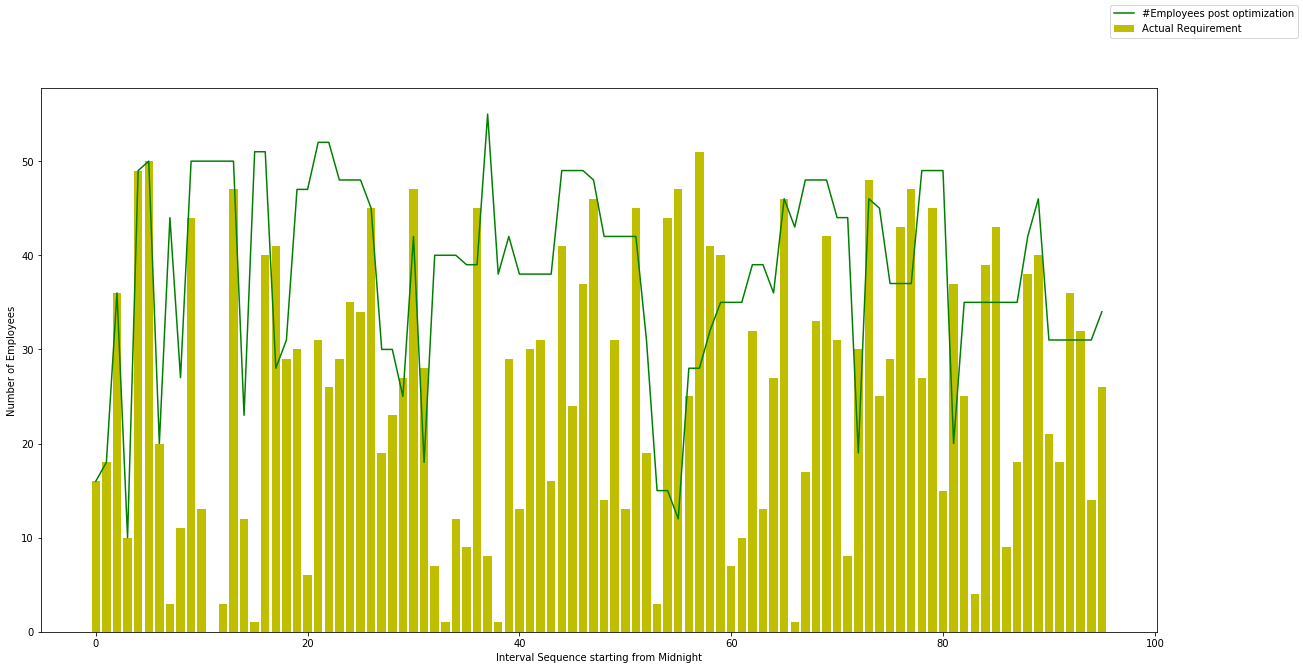

In [77]:
sorted_proposed_fillings = extractRequirementsFromModel(prob)
proposed_plot = getproposedplotfillings(meeting_poistions,sorted_proposed_fillings)
plotProposedSolution(meeting_poistions,proposed_plot)